In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, f1_score,confusion_matrix

查看整个数据集的分布情况

In [3]:
train_df = pd.read_csv("../data/nlp_new_train0/train.csv")
dev_df = pd.read_csv("../data/nlp_new_train0/dev.csv")
test_df = pd.read_csv("../data/nlp_new_train0/test.csv")
total_df = pd.concat([train_df,dev_df],ignore_index=True)

In [13]:
total_df.shape

(81080, 4)

In [14]:
total_df[total_df['label']==1].shape

(19228, 4)

In [15]:
total_df[total_df['label']==0].shape

(61852, 4)

In [16]:
train_df[train_df['label']==1].shape

(19228, 4)

In [17]:
train_df[train_df['label']==0].shape

(87775, 4)

In [7]:
df = train_df

In [8]:
for i in range(df.shape[0]):
    if ',' in df.question1[i]:
        df.question1[i] = df.question1[i].replace(',','，')
    if ',' in df.question2[i]:
        df.question2[i] = df.question2[i].replace(',','，')

/home/fuyonghao/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/fuyonghao/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
train_df.to_csv("../data/train_ten.csv",index=False)

In [10]:
train_df.shape

(107003, 4)

In [56]:
dev_df[dev_df.question1.apply(lambda x: ',' in x)]

,id,question1,question2,label


In [57]:
df.to_csv("../data/nlp_new_train0/dev.csv",index=False)

In [7]:
total_df.to_csv("../data/train.csv",index=False)

In [3]:
train_df.shape

(64864, 4)

In [4]:
dev_df.shape

(16216, 4)

In [5]:
total_df.shape

(81080, 4)

In [6]:
total_df.columns

Index(['id', 'question1', 'question2', 'label'], dtype='object')

In [82]:
total_df=test_df

In [8]:
total_df['len1'] = total_df['question1'].apply(lambda x : len(x))
total_df['len2'] = total_df['question2'].apply(lambda x : len(x))

In [10]:
total_df['len1'].describe()

count    81080.000000
mean        20.155501
std          7.741320
min          5.000000
25%         15.000000
50%         19.000000
75%         24.000000
max         71.000000
Name: len1, dtype: float64

In [11]:
total_df['len2'].describe()

count    81080.000000
mean        19.034114
std          6.413449
min          5.000000
25%         15.000000
50%         18.000000
75%         22.000000
max         71.000000
Name: len2, dtype: float64

count     5875.000000
mean      1013.153362
std       1441.753404
min          1.000000
25%        260.500000
50%        624.000000
75%       1180.000000
max      30519.000000
Name: content_len, dtype: float64

In [10]:
content_len=np.array(total_df['content_len'])
title_len =np.array(total_df['title_len'])

(array([8.77999838e-04, 4.81988042e-04, 2.35783339e-04, 1.06818971e-04,
        6.77388599e-05, 4.29881226e-05, 1.82373854e-05, 2.34480669e-05,
        2.34480669e-05, 1.04213631e-05, 1.30267038e-06, 3.90801115e-06,
        2.60534077e-06, 0.00000000e+00, 1.30267038e-06, 1.30267038e-06,
        0.00000000e+00, 2.60534077e-06, 1.30267038e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.30267038e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.30267038e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.30267038e-06,
        1.30267038e-06, 1.30267038e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.30267038e-06, 1.30267038e-06]),
 array([1.0000000e+00, 5.2392500e+02, 1.0468500e+03, 1.5697750e+03,
        2.0927000e+03, 2.6156250e+03, 3.1385500e+03, 3.6614750e+03,
        4.1844000e+03, 4.7073250e+03, 5.2302500e+03, 5.7531750e+03,
        6.2761000e+03, 6.7990250e+03, 7.3219500e+03, 7.8448750e+03,
      

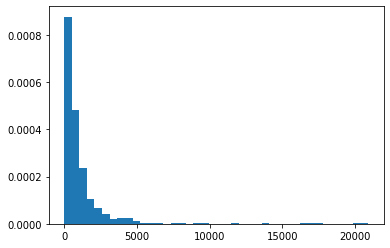

In [17]:
plt.hist(content_len,bins=40,density=True,cumulative=False)

(array([1.08559318e-02, 4.48077505e-02, 7.52562605e-03, 2.16253622e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.32507244e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.32507244e-05]),
 array([  1.  ,  16.75,  32.5 ,  48.25,  64.  ,  79.75,  95.5 , 111.25,
        127.  , 142.75, 158.5 , 174.25, 190.  , 205.75, 221.5 , 237.25,
        253.  , 268.75, 284.5 , 300.25, 316.  , 331.75, 347.5 , 363.25,
        379.  , 394.75, 410.5 , 426.25, 442.  , 457.75, 473.5 

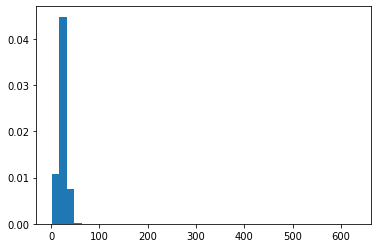

In [18]:
plt.hist(title_len,bins=40,density=True,cumulative=False)

In [146]:
label_count = []
label_count.append(len(total_df[total_df.label==0]))
label_count.append(len(total_df[total_df.label==1]))
label_count.append(len(total_df[total_df.label==2]))
label_count

[765, 3647, 2931]

In [147]:
[i/np.array(label_count).sum() for i in label_count]

[0.10418085251259702, 0.4966634890371783, 0.3991556584502247]

In [148]:
[1 /( i/np.array(label_count).sum()) for i in label_count]

[9.598692810457518, 2.013435700575816, 2.505288297509382]

<BarContainer object of 3 artists>

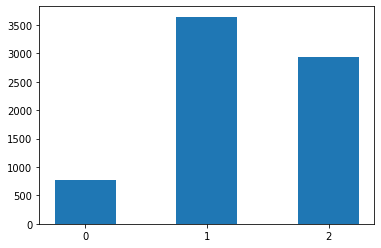

In [149]:
plt.bar(x=[0,1,2],height=label_count,width=0.5,tick_label=[0,1,2],data=label_count)

查看模型在devset上的结果

In [40]:
dev_df = pd.read_csv("../data/data_full/dev.csv")

In [109]:
result_dev = pd.read_csv("../CNNmodel_bert_full_weighted/dev_sub.csv")

In [79]:
result_dev = pd.read_csv("../CNNmodel_bert_full/dev_sub.csv")

In [110]:
ground_truth = result_dev.label
pre = result_dev.label_pre

In [76]:
f1 = f1_score(ground_truth,pre,average="macro")
report = classification_report(ground_truth,pre)
cm = confusion_matrix(ground_truth, pre)
f1

0.7989617760560169

In [111]:
f1 = f1_score(ground_truth,pre,average="macro")
report = classification_report(ground_truth,pre)
cm = confusion_matrix(ground_truth, pre)
f1

0.7817756513969178

In [77]:
cm

array([[114,  36,   5],
       [ 66, 566,  75],
       [ 16,  28, 562]])

In [112]:
cm

array([[112,  33,  10],
       [ 95, 564,  48],
       [  7,  50, 549]])

In [78]:
print(report)

              precision    recall  f1-score   support

         0.0       0.58      0.74      0.65       155
         1.0       0.90      0.80      0.85       707
         2.0       0.88      0.93      0.90       606

    accuracy                           0.85      1468
   macro avg       0.79      0.82      0.80      1468
weighted avg       0.86      0.85      0.85      1468



In [113]:
print(report)

              precision    recall  f1-score   support

         0.0       0.52      0.72      0.61       155
         1.0       0.87      0.80      0.83       707
         2.0       0.90      0.91      0.91       606

    accuracy                           0.83      1468
   macro avg       0.77      0.81      0.78      1468
weighted avg       0.85      0.83      0.84      1468



In [81]:
f1 = f1_score(ground_truth,pre,average="macro")
report = classification_report(ground_truth,pre)
cm = confusion_matrix(ground_truth, pre)
f1

0.8031249621240487

In [82]:
cm

array([[102,  44,   9],
       [ 53, 583,  71],
       [  3,  35, 568]])

In [83]:
print(report)

              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65       155
         1.0       0.88      0.82      0.85       707
         2.0       0.88      0.94      0.91       606

    accuracy                           0.85      1468
   macro avg       0.80      0.81      0.80      1468
weighted avg       0.85      0.85      0.85      1468



Text(33.0, 0.5, 'truelabel')

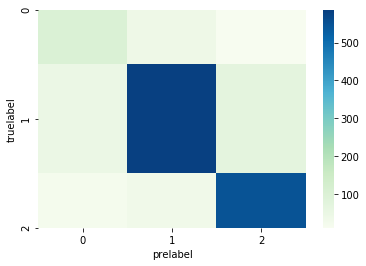

In [62]:
fig,ax = plt.subplots()
sn.heatmap(cm,cmap="GnBu",ax=ax)
ax.set_xlabel("prelabel")
ax.set_ylabel("truelabel")

Text(33.0, 0.5, 'truelabel')

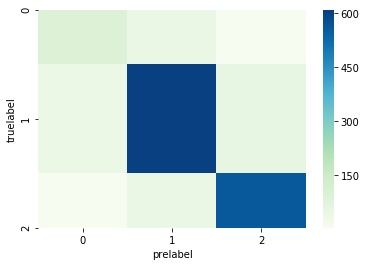

In [66]:
fig,ax = plt.subplots()
sn.heatmap(cm,cmap="GnBu",ax=ax)
ax.set_xlabel("prelabel")
ax.set_ylabel("truelabel")

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [87]:
x,y = load_iris(return_X_y=True)

In [90]:
clf = LogisticRegression??

In [91]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

In [93]:
clf = clf.fit(x,y)

/home/fuyonghao/anaconda3/envs/torch/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [98]:
clf.predict(x[:2,:])

array([0, 0])

In [99]:
clf.score(x[:2,:],y[:2])

1.0

In [100]:
clf.score??

In [101]:
clf??

In [102]:
from sklearn.model_selection import train_test_split

In [197]:
from pkuseg import pkuseg

In [214]:
seg = pkuseg(model_name='news',postag=False)

In [215]:
from random import shuffle

In [216]:
word_list = seg.cut('江歌事件:教会孩子，善良的同时更要懂得保护自己!')

In [217]:
shuffle(word_list)

In [219]:
s = ''.join(word_list)

'懂得要自己事件!善良江歌同时更:教会保护，的孩子'

In [44]:
dev_auged = double_long_data(dev_df)
dev_auged['title_len'] = dev_auged['title'].apply(lambda x : len(x))
dev_auged['content_len'] = dev_auged['content'].apply(lambda x : len(x))

/home/fuyonghao/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
dev_auged.shape

(2238, 7)

In [63]:
train_auged = double_long_data(train_df)
train_auged['title_len'] = train_auged['title'].apply(lambda x : len(x))
train_auged['content_len'] = train_auged['content'].apply(lambda x : len(x))

/home/fuyonghao/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
test_auged = double_test_data(test_df)
test_auged['title_len'] = test_auged['title'].apply(lambda x : len(x))
test_auged['content_len'] = test_auged['content'].apply(lambda x : len(x))

/home/fuyonghao/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


进行模型数据的增强

In [72]:
def double_long_data(df):
    aug_df = df[df['content_len'] > 545].copy()
    for i in aug_df.index:
        begin = 512-aug_df['content_len'][i]
        begin = begin if begin>-512 else -512
        aug_df['content'][i]= aug_df['content'][i][begin:]
    df_auged = pd.concat([df,aug_df],ignore_index=True)
    return df_auged
#     word_list = seg.cut(aug_df['title'][i])
#     shuffle(word_list)
#     title = ''.join(word_list)
def double_test_data(df):
    aug_df = df[df['content_len'] > 545].copy()
    un_aug_df = df[df['content_len'] <= 545].copy()
    for i in aug_df.index:
        begin = 512-aug_df['content_len'][i]
        begin = begin if begin>-512 else -512
        aug_df['content'][i]= aug_df['content'][i][begin:]
    df_auged = pd.concat([df,aug_df,un_aug_df],ignore_index=True)
    return df_auged

In [59]:
dev_labels

True

In [60]:
import torch

0